# Working with magnetograms

In this example, we see how to do basic operations with (synoptic) magnetograms. 

All magnetogram-specifc routines are located in the `euhforia.magnetogram` module. To access it, the path of the EUHFORIA root directory needs to be included. In addition, we import a few basic Python modules that we will be needing.

In [1]:
import datetime
import matplotlib.pyplot as plt

# Make the plots appear inside the notebook and not in a separate window 
%matplotlib inline 

# If your system supports it, you can also use the following instead in order to make 
# the inline plots interactive 
# %matplotlib notebook

The magnetograms are retrieved based on date. Let's define the date of interest:

In [2]:
date = datetime.datetime(year=2012, month=6, day=30, hour=2)

Let's download a GONG standard synoptic magnetogram for this date. This is done using the `retrieve` function that downloads the magnetogram given the datetime object.

In [5]:
import euhforia.magnetogram.gong

In [6]:
gong_magnetogram_file = euhforia.magnetogram.gong.retrieve(date, save_directory="data/")

Now that we have obtained the data file, we can read its contents:

In [8]:
gong_magnetogram = euhforia.magnetogram.gong.read(gong_magnetogram_file)

Let's plot the map. For this, we use the `euhforia.plot` module.

In [9]:
import euhforia.plot.synoptic

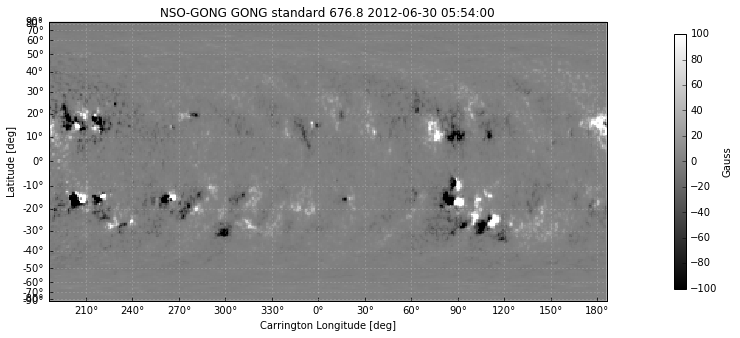

In [10]:
gong_magnetogram.plot_settings['norm'] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(gong_magnetogram); # The plot returns fig, ax, the semicolon suppresses info on that

In [ ]:
# Note that if you did not use %matplotlib inline/notebook, you need to show the window
#plt.show()

Notice that the min/max values of the plot were set using the `plot_settings` of the map. Notice also the date of the map: it is not exactly the same as what was set in `date`. This is because the data is available at a specific cadence only, the `retrieve` function selects the file from the given day that is closest to the specified hour. 

Now, let's instead load and plot a GONG/ADAPT map for the same date. The workflow is very similar to the above.

In [11]:
import euhforia.magnetogram.gong_adapt

In [12]:
adapt_magnetogram_file = euhforia.magnetogram.gong_adapt.retrieve(date, save_directory="data/")

In [13]:
adapt_magnetogram = euhforia.magnetogram.gong_adapt.read(adapt_magnetogram_file, realization_idx=0)

Note that there is an additional parameter `realization_idx` passed to the function as compared to the standard GONG file reader. This allows to choose between 12 realizations that the ADAPT assimilation procedure generates.

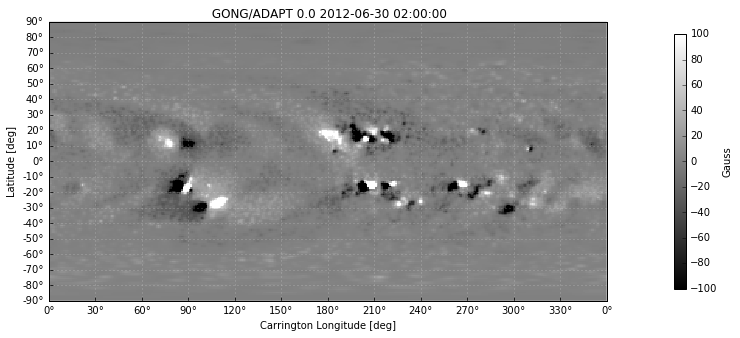

In [14]:
adapt_magnetogram.plot_settings["norm"] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(adapt_magnetogram);

Looking at the two plotted magnetograms, there are a few things to note:

   1. The time of the maps is different. 

   2. The position of the zero-longitude is different. The GONG/ADAPT maps are stored such that the first column of pixels always correspond to Carrington longitude equal to zero (so called fixed CR longitude), while for GONG standard maps the Carrington longitude of the first pixels varies. 

   3. The latitude coordinates are different. This is because the projection is different: GONG/ADAPT maps are given using Plate Carée, while the standard maps are Cylindrical Equal Area (CEA). This means that in terms of latitude, the axis is non-uniform for GONG standard maps. This info is also stored in the maps:

In [15]:
print("GONG:", gong_magnetogram.coordinate_system)
print("GONG/ADAPT:", adapt_magnetogram.coordinate_system)

GONG: Pair(x='CRLN-CEA', y='CRLT-CEA')
GONG/ADAPT: Pair(x='CRLN-CAR', y='CRLT-CAR')


With the maps, we can extract various information, e.g. the coordinates of the pixel centers. Functions such as these that pertain to maps in general are in the `euhforia.core.map` module:

In [16]:
import euhforia.core.map

In [17]:
lon, lat = euhforia.core.map.get_center_coordinates(gong_magnetogram)

In [18]:
print(lon[0:10])
print(lat[0:10])

[ 186.5  187.5  188.5  189.5  190.5  191.5  192.5  193.5  194.5  195.5]
[-83.95769498 -79.52468616 -76.46379726 -73.96872822 -71.80512766
 -69.86578925 -68.09101906 -66.44353569 -64.89821129 -63.43715937]


The total flux (signed and unsigned) of maps is often of interest:

In [19]:
print(euhforia.core.map.compute_flux(gong_magnetogram))
print(euhforia.core.map.compute_unsigned_flux(gong_magnetogram))

-6.02678151581
67.0656263104


In [20]:
print(euhforia.core.map.compute_flux(adapt_magnetogram))
print(euhforia.core.map.compute_unsigned_flux(adapt_magnetogram))

0.443365783299
107.239480434


For most models, EUHFORIA requires the input magnetogram to be in a uniform (Plate Carée) projection. Therefore, a transformation operation is often needed. This can be done using the `regrid`-function:

In [21]:
regridded_adapt_magnetogram = euhforia.core.map.regrid(adapt_magnetogram, deg_per_pixel=2.0)

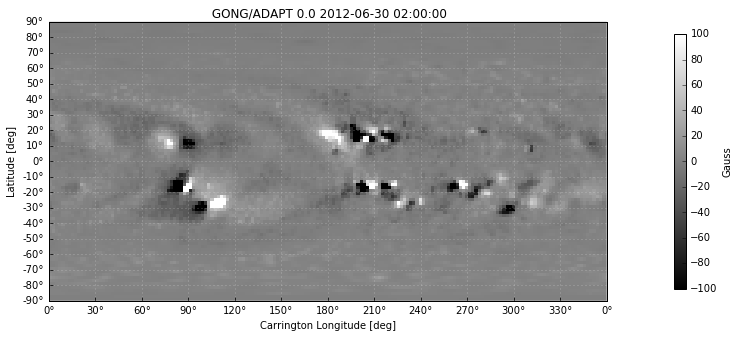

In [22]:
regridded_adapt_magnetogram.plot_settings["norm"] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(regridded_adapt_magnetogram);

In [23]:
regridded_gong_magnetogram = euhforia.core.map.regrid(gong_magnetogram, deg_per_pixel=2.0)

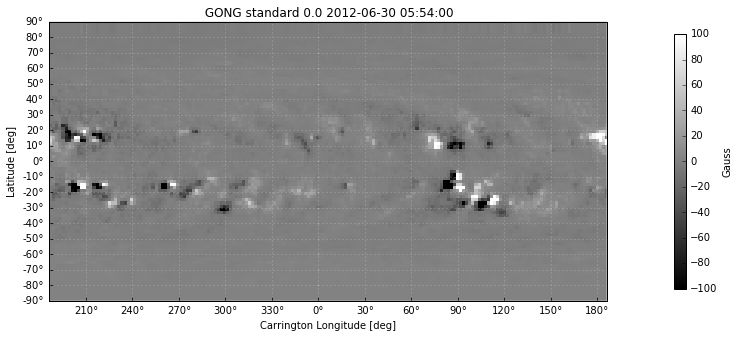

In [24]:
regridded_gong_magnetogram.plot_settings['norm'] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(regridded_gong_magnetogram);

Note that the regridding is done using a flux-conserving procedure:

In [25]:
print(euhforia.core.map.compute_flux(gong_magnetogram))
print(euhforia.core.map.compute_flux(regridded_gong_magnetogram))

-6.02678151581
-6.02678151581


In [26]:
print(euhforia.core.map.compute_flux(adapt_magnetogram))
print(euhforia.core.map.compute_flux(regridded_adapt_magnetogram))

0.443365783299
0.443365783299


It is also often more convenient to analyze the maps when they are in Stonyhurst (HEEQ) coordinates so as to make clear where the central meridian is. This can be done as follows:

In [27]:
regridded_adapt_magnetogram_heeq = euhforia.core.map.to_stonyhurst(regridded_adapt_magnetogram)

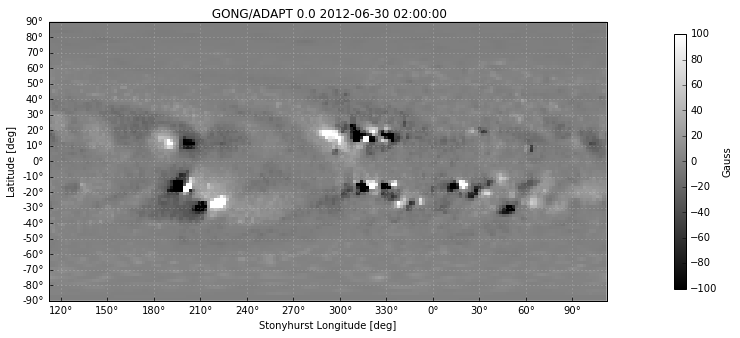

In [28]:
regridded_adapt_magnetogram_heeq.plot_settings["norm"] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(regridded_adapt_magnetogram_heeq);

In [29]:
regridded_gong_magnetogram_heeq = euhforia.core.map.to_stonyhurst(regridded_gong_magnetogram)

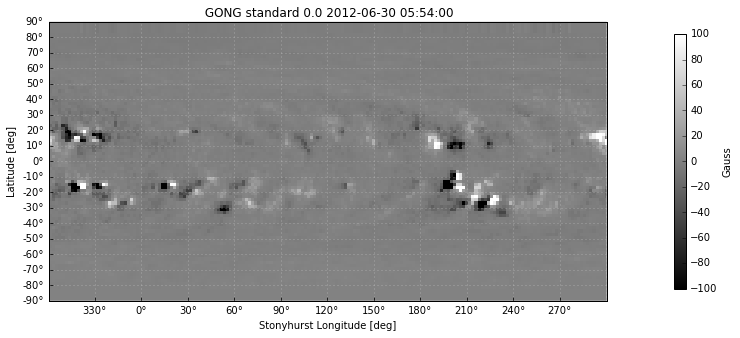

In [30]:
regridded_gong_magnetogram_heeq.plot_settings["norm"] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(regridded_gong_magnetogram_heeq);

In [31]:
gong_magnetogram_heeq = euhforia.core.map.to_stonyhurst(gong_magnetogram)

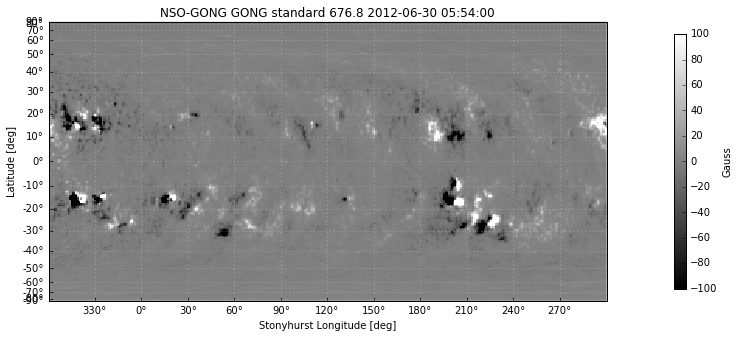

In [32]:
gong_magnetogram_heeq.plot_settings["norm"] = plt.Normalize(-100, 100)
euhforia.plot.synoptic.plot(gong_magnetogram_heeq);

***